# `qp` Demo

In this notebook we use the `qp` module to approximate some standard 1-D PDFs using sets of quantiles, and assess the accuracy of the quantile parametrization(TM) in comparison to other popular parametrizations.

### Requirements

To run `qp`, you will need to first install the module. 

In [1]:
import numpy as np
import scipy.stats as sps
import scipy.interpolate as spi

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

import qp

## The `qp.PDF` Class

This is the basic element of `qp` - an object representing a probability density function. This class is stored in the module `pdf.py`.

In [2]:
# ! cat qp/pdf.py

## Approximating a Gaussian

Let's summon a PDF object, and initialize it with a standard function - a Gaussian.

In [3]:
dist = sps.norm(loc=0, scale=1)
P = qp.PDF(truth=dist)

### Samples

Let's sample the PDF to see how it looks.  When we plot the `PDF` object, both the true and sampled distributions are displayed.

Evaluating the true distribution.
Creating interpolator for samples parametrization.


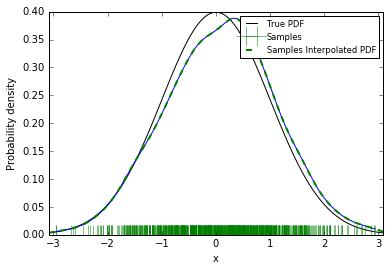

In [4]:
samples = P.sample(1000, using='truth', vb=False)
S = qp.PDF(samples=samples)
P.plot()

### Quantile Parametrization

Now, let's compute a set of evenly spaced quantiles. These will be carried by the `PDF` object as `p.quantiles`.  We also demonstrate the initialization of a `PDF` object with quantiles and no truth function.

In [5]:
quants = np.array([0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.96,0.97,0.98,0.99])
quantiles = P.quantize(quants=quants)#(percent=10.)
Q = qp.PDF(quantiles=quantiles)

('Calculating 19 quantiles: ', array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.1 ,  0.2 ,  0.3 ,  0.4 ,
        0.5 ,  0.6 ,  0.7 ,  0.8 ,  0.9 ,  0.95,  0.96,  0.97,  0.98,  0.99]))
('Resulting 19 quantiles: ', array([-2.32634787, -2.05374891, -1.88079361, -1.75068607, -1.64485363,
       -1.28155157, -0.84162123, -0.52440051, -0.2533471 ,  0.        ,
        0.2533471 ,  0.52440051,  0.84162123,  1.28155157,  1.64485363,
        1.75068607,  1.88079361,  2.05374891,  2.32634787]))
((19,), (19,))


### Binned Parametrization

Let's also compute a histogram representation that will be carried by the `PDF` object as `p.histogram`.  We can similary initialize a `PDF` object with a histogram and no truth function.

In [6]:
T = qp.PDF(truth=dist)
histogram = T.histogramize(number=10, binrange=[-2., 2.])
R = qp.PDF(histogram=histogram)

('Calculating histogram: ', array([ -2.00000000e+00,  -1.60000000e+00,  -1.20000000e+00,
        -8.00000000e-01,  -4.00000000e-01,  -4.44089210e-16,
         4.00000000e-01,   8.00000000e-01,   1.20000000e+00,
         1.60000000e+00,   2.00000000e+00]))
('Result: ', array([ 0.0801229 ,  0.15067595,  0.24196432,  0.33180715,  0.38855435,
        0.38855435,  0.33180715,  0.24196432,  0.15067595,  0.0801229 ]))


### Interpolation of any parametrization

Let's test interpolation at a single point for the quantile parametrization.

In [7]:
print(P.approximate(0.314, using='quantiles'))

(0.314, array(0.3877977510402377))


Now, let's interpolate the function over an evenly spaced grid with points within and out of the quantile range.  

In [8]:
grid = np.linspace(-3., 3., 100)
P.approximate(grid, using='quantiles')

(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
        -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
        -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
        -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
        -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
        -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
        -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
        -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
        -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
        -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
         0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
         0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
         0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
         0.93939394,  1.        ,  1.06060606,  1.1

## Comparing Parametrizations

`qp` supports both qualitative and quantitative comparisons between different distributions, across parametrizations.

### Qualitative Comparisons: Plotting

Let's visualize the PDF object in order to compare the truth and the approximations.  The solid, black line shows the true PDF evaluated between the bounds.  The green rugplot shows the locations of the 1000 samples we took.  The vertical, dotted, blue lines show the percentiles we asked for, and the hotizontal, dotted, red lines show the 10 equally spaced bins we asked for.  Note that the quantiles refer to the probability distribution *between the bounds*, because we are not able to integrate numerically over an infinite range. Interpolations of each parametrization are given as dashed lines in their corresponding colors.  Note that the interpolations of the quantile and histogram parametrizations are so close to each other that the difference is almost imperceptible!

Evaluating the true distribution.
Creating interpolator for histogram parametrization.


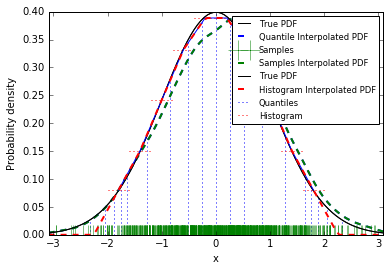

In [9]:
P.plot()
T.plot()

### Quantitative Comparisons

Next, let's compare the different parametrizations to the truth using the Kullback-Leibler Divergence (KLD).  The KLD is a measure of how close two probability distributions are to one another -- a smaller value indicates closer agreement.  It is measured in units of bits of information, the information lost in going from the second distribution to the first distribution.  The KLD calculator here takes in a shared grid upon which to evaluate the true distribution and the interpolated approximation of that distribution and returns the KLD of the approximation relative to the truth, which is not in general the same as the KLD of the truth relative to the approximation.  Below, we'll calculate the KLD of the approximation relative to the truth over different ranges, showing that it increases as it includes areas where the true distribution and interpolated distributions diverge.

Evaluating the true distribution.
Evaluating an interpolation of the quantiles parametrization.
Creating interpolator for quantiles parametrization.
Evaluating the true distribution.
Evaluating an interpolation of the quantiles parametrization.
Evaluating the true distribution.
Evaluating an interpolation of the quantiles parametrization.
Evaluating the true distribution.
Evaluating an interpolation of the histogram parametrization.
Creating interpolator for histogram parametrization.
Evaluating the true distribution.
Evaluating an interpolation of the histogram parametrization.
Evaluating the true distribution.
Evaluating an interpolation of the histogram parametrization.
Evaluating the true distribution.
Evaluating an interpolation of the samples parametrization.
Creating interpolator for samples parametrization.
Evaluating the true distribution.
Evaluating an interpolation of the samples parametrization.
Evaluating the true distribution.
Evaluating an interpolation of the samples pa

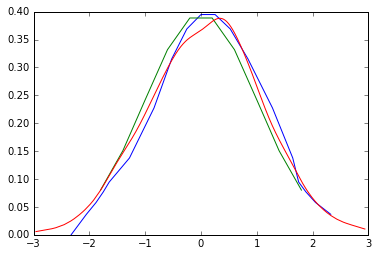

In [10]:
qD1 = qp.utils.calculate_kl_divergence(P, Q, limits=(-1.,1.))
qD2 = qp.utils.calculate_kl_divergence(P, Q, limits=(-2.,2.))
qD3 = qp.utils.calculate_kl_divergence(P, Q, limits=(-3.,3.))

hD1 = qp.utils.calculate_kl_divergence(T, R, limits=(-1.,1.))
hD2 = qp.utils.calculate_kl_divergence(T, R, limits=(-2.,2.))
hD3 = qp.utils.calculate_kl_divergence(T, R, limits=(-3.,3.))

sD1 = qp.utils.calculate_kl_divergence(P, S, limits=(-1.,1.))
sD2 = qp.utils.calculate_kl_divergence(P, S, limits=(-2.,2.))
sD3 = qp.utils.calculate_kl_divergence(P, S, limits=(-3.,3.))

print(qD1, qD2, qD3)
print(hD1, hD2, hD3)
print(sD1, sD2, sD3)

The progression of KLD values should follow that of the root mean square (RMS), another measure of how close two functions are to one another.  The RMS also increases as it includes areas where the true distribution and interpolated distribution diverge.  Unlike the KLD, the RMS is symmetric, meaning the distance measured is not that of one distribution from the other but of the symmetric distance between them.

In [11]:
qRMS1 = qp.utils.calculate_rms(P, Q, limits=(-1.,1.))
qRMS2 = qp.utils.calculate_rms(P, Q, limits=(-2.,2.))
qRMS3 = qp.utils.calculate_rms(P, Q, limits=(-3.,3.))

hRMS1 = qp.utils.calculate_rms(T, R, limits=(-1.,1.))
hRMS2 = qp.utils.calculate_rms(T, R, limits=(-2.,2.))
hRMS3 = qp.utils.calculate_rms(T, R, limits=(-3.,3.))

sRMS1 = qp.utils.calculate_rms(P, S, limits=(-1.,1.))
sRMS2 = qp.utils.calculate_rms(P, S, limits=(-2.,2.))
sRMS3 = qp.utils.calculate_rms(P, S, limits=(-3.,3.))

print(qRMS1, qRMS2, qRMS3)
print(hRMS1, hRMS2, hRMS3)
print(sRMS1, sRMS2, sRMS3)

Evaluating the true distribution.
Evaluating an interpolation of the quantiles parametrization.
Evaluating the true distribution.
Evaluating an interpolation of the quantiles parametrization.
Evaluating the true distribution.
Evaluating an interpolation of the quantiles parametrization.
Evaluating the true distribution.
Evaluating an interpolation of the histogram parametrization.
Evaluating the true distribution.
Evaluating an interpolation of the histogram parametrization.
Evaluating the true distribution.
Evaluating an interpolation of the histogram parametrization.
Evaluating the true distribution.
Evaluating an interpolation of the samples parametrization.
Evaluating the true distribution.
Evaluating an interpolation of the samples parametrization.
Evaluating the true distribution.
Evaluating an interpolation of the samples parametrization.
(0.029967112247147893, 0.03141020461361331, 0.026611628254938)
(0.0055699980951885884, 0.0045633691956858506, 0.010755729317855272)
(0.0294455

## Advanced Usage

### Composite PDFs

In addition to individual `scipy.stats.rv_continuous` objects, `qp` can be initialized with true distributions that are linear combinations of `scipy.stats.rv_continuous` objects.  To do this, one must create the component distributions and specify their relative weights.

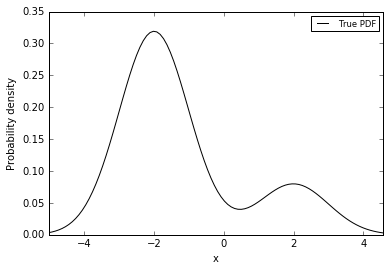

In [12]:
component_1 = {}
component_1['function'] = sps.norm(loc=-2., scale=1.)
component_1['coefficient'] = 4.
component_2 = {}
component_2['function'] = sps.norm(loc=2., scale=1.)
component_2['coefficient'] = 1.
dist_info = [component_1, component_2]

C_dist = qp.composite(dist_info)
C = qp.PDF(truth=C_dist)
C.plot()

We can calculate the quantiles for such a distribution.  Note: Something is still going wrong here!

('Calculating 35 quantiles: ', array([ 0.02777778,  0.05555556,  0.08333333,  0.11111111,  0.13888889,
        0.16666667,  0.19444444,  0.22222222,  0.25      ,  0.27777778,
        0.30555556,  0.33333333,  0.36111111,  0.38888889,  0.41666667,
        0.44444444,  0.47222222,  0.5       ,  0.52777778,  0.55555556,
        0.58333333,  0.61111111,  0.63888889,  0.66666667,  0.69444444,
        0.72222222,  0.75      ,  0.77777778,  0.80555556,  0.83333333,
        0.86111111,  0.88888889,  0.91666667,  0.94444444,  0.97222222]))
('Resulting 35 quantiles: ', array([-3.8155   , -3.4799375, -3.2581875, -3.0853125, -2.94     ,
       -2.8121875, -2.6965   , -2.5894375, -2.48875  , -2.3928125,
       -2.300375 , -2.2104375, -2.1221875, -2.0348125, -1.94775  ,
       -1.8603125, -1.7718125, -1.6814375, -1.5884375, -1.4916875,
       -1.39     , -1.2815625, -1.164    , -1.0338125, -0.8850625,
       -0.707375 , -0.479125 , -0.1446875,  0.4288125,  1.0506875,
        1.49425  ,  1.860875 ,  

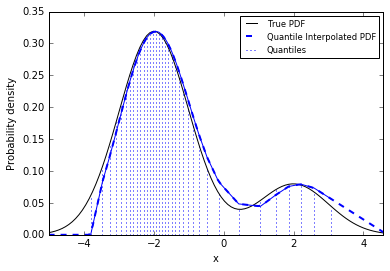

In [13]:
C_dist = qp.composite(dist_info)
C = qp.PDF(truth=C_dist)
C.quantize(number=35)
C.plot()

Similarly, the histogram parametrization is also supported for composite PDFs.

('Calculating histogram: ', array([-6.        , -5.65714286, -5.31428571, -4.97142857, -4.62857143,
       -4.28571429, -3.94285714, -3.6       , -3.25714286, -2.91428571,
       -2.57142857, -2.22857143, -1.88571429, -1.54285714, -1.2       ,
       -0.85714286, -0.51428571, -0.17142857,  0.17142857,  0.51428571,
        0.85714286,  1.2       ,  1.54285714,  1.88571429,  2.22857143,
        2.57142857,  2.91428571,  3.25714286,  3.6       ,  3.94285714,
        4.28571429,  4.62857143,  4.97142857,  5.31428571,  5.65714286,  6.        ]))
('Result: ', array([  2.23649731e-04,   7.74355718e-04,   2.38630285e-03,
         6.54529919e-03,   1.59793018e-02,   3.47228502e-02,
         6.71593611e-02,   1.15620585e-01,   1.77175846e-01,
         2.41667323e-01,   2.93413792e-01,   3.17107336e-01,
         3.05102450e-01,   2.61452549e-01,   1.99894337e-01,
         1.37265752e-01,   8.67810159e-02,   5.47823573e-02,
         4.13514891e-02,   4.26865155e-02,   5.31459602e-02,
         6.64

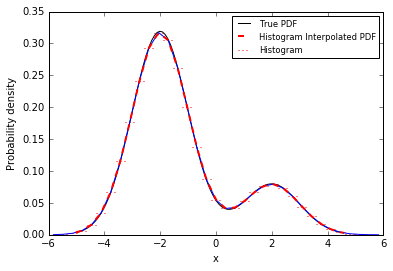

In [14]:
C_dist = qp.composite(dist_info)
C = qp.PDF(truth=C_dist)
C.histogramize(binrange=[-6., 6.], number=35)
C.plot()

Finally, samples from this distribution may also be taken, and a PDF may be reconstructed from them.  Note: this uses `scipy.stats.gaussian_kde`, which determines its bandwidth/kernel size using [Scott's Rule](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html), which clearly leaves something to be desired! 

Sampling from truth parametrization.
('Sampled values: ', array([-1.87148816,  0.60650724, -2.4937905 , -3.05434386, -1.57071688,
       -2.70263633, -0.36986347, -1.48860089, -0.53588014, -2.58666133,
       -1.77153586, -3.63033974, -0.30968874, -3.41899311, -2.59723521,
       -1.11926086, -1.26502242, -3.00892542, -1.38607603, -2.78331268,
       -1.19059736, -2.25529104, -1.31177416, -1.17497316, -2.11420747,
       -0.98722782, -0.62270301, -1.62972298, -2.12424054, -2.95709772,
       -2.91353858, -1.18021236, -3.71840946, -2.51696988, -1.19461469,
       -2.24123534, -3.25904959, -1.07918947, -2.78425673, -1.10908844,
        0.88672845, -1.54959872, -2.2247651 , -1.53731365, -2.66008832,
       -1.49896719, -1.49143754, -2.57067836, -1.34886488, -4.77689322,
       -2.82270004, -2.09336803, -0.11899219, -0.81320606, -2.89123124,
       -0.68644417, -1.79313394,  0.35226181, -2.08161437, -2.35943409,
       -1.79756162, -2.87531196, -1.95799972, -1.84666417, -0.75753684,
      

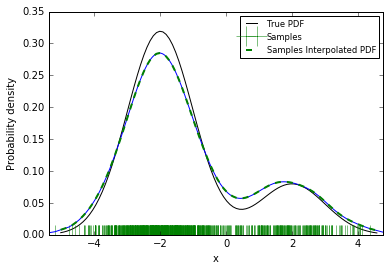

In [15]:
C_dist = qp.composite(dist_info)
C = qp.PDF(truth=C_dist)
C.sample(N=1000, 'vb'=False)
C.plot()

### Surveys of PDFs